# Jupyter Notebook - ADS-V Präsenz

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import sweetviz as sw

import os

In [2]:
FILENAMEDATA = os.path.join("input", "research_dataset.csv")
FILENAMEDATAREPORT = os.path.join("reports", "research_dataset.html")
CREATEREPORT = False

In [3]:
dfData = pd.read_csv(FILENAMEDATA)
dfData

,sales_calls,interactions,economy,last_upgrade,discount,monthly_usage,ad_spend,bugs_reported,did_renew
0,2.0,2.0,0.719054,17.036984,0.283774,0.825265,0.803090,1.0,0
1,3.0,3.0,0.188017,13.464172,0.059483,0.287509,0.275391,0.0,1
2,2.0,2.0,0.387437,1.631930,0.167273,0.433489,1.396768,1.0,0
3,2.0,2.0,0.866165,7.710981,0.330207,0.235349,0.218303,0.0,0
4,2.0,2.0,0.585444,6.391478,0.299390,0.824211,0.815360,1.0,0
...,...,...,...,...,...,...,...,...,...
9995,2.0,3.0,0.715427,10.540743,0.373957,0.373962,0.363134,0.0,0
9996,2.0,2.0,0.564662,1.878001,0.305935,0.543083,1.521588,0.0,0
9997,3.0,3.0,0.290156,11.794950,0.376242,0.245795,0.224300,0.0,0
9998,0.0,1.0,0.989440,12.251466,0.280882,0.271200,0.255873,0.0,0


In [4]:
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sales_calls    10000 non-null  float64
 1   interactions   10000 non-null  float64
 2   economy        10000 non-null  float64
 3   last_upgrade   10000 non-null  float64
 4   discount       10000 non-null  float64
 5   monthly_usage  10000 non-null  float64
 6   ad_spend       10000 non-null  float64
 7   bugs_reported  10000 non-null  float64
 8   did_renew      10000 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 703.3 KB


In [5]:
"""
sales_calls Anzahl Anrufe SalesTeam
interactions Zusätzliche Interaktionen mit Kunden, wie sales_calls
economy Wirtschaftliche Lage (Hoch = Gut)
last_upgrade Wann wurde zuletzt geupdatet
discount Rabatt
monthly_usage Benutzungshäufigkeit (Hoch = viel)
ad_spend Kunde zahlt für Produkt
bugs_reported Anzahl Fehler gemeldet
did_renew Abo erneuert Ja Nein
"""

'\nsales_calls Anzahl Anrufe SalesTeam\ninteractions Zusätzliche Interaktionen mit Kunden, wie sales_calls\neconomy Wirtschaftliche Lage (Hoch = Gut)\ndiscount Rabatt\nmonthly_usage Benutzungshäufigkeit (Hoch = viel)\nad_spend Werbebudget für Kunden\nbugs_reported Anzahl Fehler gemeldet\ndid_renew Abo erneuert Ja Nein\n'

In [6]:
if CREATEREPORT:
    report = sw.analyze(dfData)
    report.show_html(FILENAMEDATAREPORT)

                                             |                                             | [  0%]   00:00 ->…

Report reports\research_dataset.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
dfData.corr()

,sales_calls,interactions,economy,last_upgrade,discount,monthly_usage,ad_spend,bugs_reported,did_renew
sales_calls,1.000000,0.936914,-0.000088,0.003571,-0.063689,0.014858,-0.004989,0.049046,0.092794
interactions,0.936914,1.000000,0.002126,0.007399,-0.053593,0.016725,-0.005694,0.041346,0.092897
economy,-0.000088,0.002126,1.000000,0.005528,0.015662,-0.005152,-0.000166,-0.005529,0.069970
last_upgrade,0.003571,0.007399,0.005528,1.000000,0.006593,0.002809,-0.447808,0.013685,-0.111749
discount,-0.063689,-0.053593,0.015662,0.006593,1.000000,-0.155299,-0.065024,-0.256914,-0.252809
monthly_usage,0.014858,0.016725,-0.005152,0.002809,-0.155299,1.000000,0.399607,0.407401,0.151535
ad_spend,-0.004989,-0.005694,-0.000166,-0.447808,-0.065024,0.399607,1.000000,0.159420,0.200403
bugs_reported,0.049046,0.041346,-0.005529,0.013685,-0.256914,0.407401,0.159420,1.000000,0.187882
did_renew,0.092794,0.092897,0.069970,-0.111749,-0.252809,0.151535,0.200403,0.187882,1.000000


In [13]:
dfData["interactions"].value_counts()

interactions
2.0    2544
3.0    2419
1.0    2229
4.0    1500
0.0    1038
5.0     250
6.0      16
7.0       4
Name: count, dtype: int64

In [14]:
rowSel = dfData["interactions"] == 0
dfData.loc[rowSel, "did_renew"].mean()

0.23892100192678228

In [15]:
dfData.loc[~rowSel, "did_renew"].mean()

0.31209551439410843

In [8]:
"+".join(dfData.columns)

'sales_calls+interactions+economy+last_upgrade+discount+monthly_usage+ad_spend+bugs_reported+did_renew'

In [31]:
m = smf.logit(formula = "did_renew ~  interactions+economy+last_upgrade+discount+monthly_usage+ad_spend+bugs_reported", data = dfData).fit()
print(m.summary())

Optimization terminated successfully.
         Current function value: 0.551423
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              did_renew   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.1028
Time:                        15:30:15   Log-Likelihood:                -5514.2
converged:                       True   LL-Null:                       -6146.3
Covariance Type:            nonrobust   LLR p-value:                9.565e-269
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6821      0.119     -5.712      0.000      -0.916      -0.448
interactions      0.

In [10]:
m = smf.logit(formula = "did_renew ~ interactions+economy+last_upgrade+monthly_usage+bugs_reported", data = dfData).fit()
print(m.summary())

Optimization terminated successfully.
         Current function value: 0.580582
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              did_renew   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                 0.05539
Time:                        13:55:54   Log-Likelihood:                -5805.8
converged:                       True   LL-Null:                       -6146.3
Covariance Type:            nonrobust   LLR p-value:                6.479e-145
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.7886      0.091    -19.639      0.000      -1.967      -1.610
interactions      0.

In [11]:
m = smf.logit(formula = "did_renew ~ discount + ad_spend", data = dfData).fit()
print(m.summary())

Optimization terminated successfully.
         Current function value: 0.564614
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              did_renew   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                 0.08137
Time:                        13:58:28   Log-Likelihood:                -5646.1
converged:                       True   LL-Null:                       -6146.3
Covariance Type:            nonrobust   LLR p-value:                6.147e-218
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1284      0.068      1.874      0.061      -0.006       0.263
discount      -6.4390      0.

C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ad_spend', ylabel='Count'>

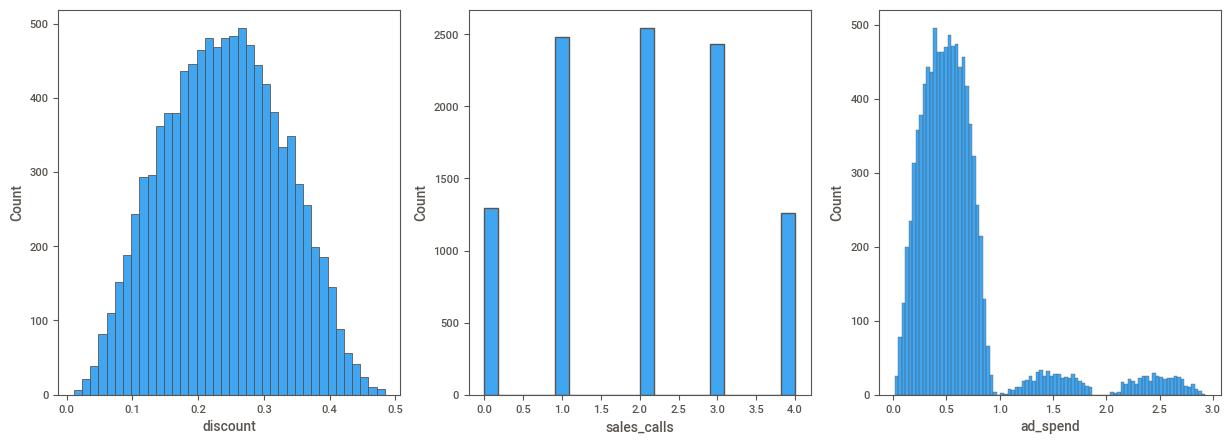

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

sns.histplot(dfData["discount"], ax = ax[0])
sns.histplot(dfData["sales_calls"], ax = ax[1])
sns.histplot(dfData["ad_spend"], ax = ax[2])

In [22]:
pd.crosstab(dfData["sales_calls"], dfData["interactions"])

interactions,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
sales_calls,,,,,,,,
0.0,1038,231,23,1,0,0,0,0
1.0,0,1998,432,41,7,0,0,0
2.0,0,0,2089,411,39,4,0,0
3.0,0,0,0,1966,412,50,0,1
4.0,0,0,0,0,1042,196,16,3


In [28]:
pd.crosstab(dfData["did_renew"], dfData["sales_calls"], normalize = True).T

did_renew,0,1
sales_calls,,
0.0,0.0984,0.0309
1.0,0.1821,0.0657
2.0,0.1756,0.0787
3.0,0.1608,0.0821
4.0,0.0786,0.0471


In [25]:
pd.pivot_table(
    data = dfData,
    index = "sales_calls",
    values = "did_renew",
    aggfunc = "mean"
)

,did_renew
sales_calls,
0.0,0.238979
1.0,0.265133
2.0,0.309477
3.0,0.337999
4.0,0.374702


In [29]:
pd.pivot_table(
    data = dfData,
    index = "sales_calls",
    values = "discount",
    aggfunc = "mean"
)

,discount
sales_calls,
0.0,0.247799
1.0,0.244305
2.0,0.237554
3.0,0.234697
4.0,0.229332
